In [1]:
#%matplotlib widget
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
import sys
from pathlib import Path
import torch
import numpy as np
import tqdm

from ripser import ripser
from persim import plot_diagrams

# Plotting
import matplotlib
from matplotlib import pyplot as plt
plt.style.use('../bioAI.mplstyle')

'''
CUSTOM PACKAGES
'''
# avoid adding multiple relave paths to sys.path
sys.path.append("../src") if "../src" not in sys.path else None

from Models import SorscherRNN
from Experiment import Experiment
from datahandling import Dataset, MESampler
from plotting_functions import *
from synthetic_grid_cells import *
from methods import *
from stats import *

In [3]:
#base_path = Path("/storA/GridCells/")
base_path = "/mnt/WD12TB-HDD"
experiment = Experiment(name="gg-3ME", base_path=base_path)
experiment.setup()

Experiment <gg-3ME> already EXISTS. Loading experiment settings!
Loading experiment details
This experiment has ALREADY been setup - SKIPPING.


False

In [4]:
panesize = set_size(width=345, mode='max')
figsize = np.array((panesize[0],panesize[1]))
panesize

(4.77376504773765, 7.610350076103501)

In [5]:
fig_width = (panesize[0]/3) / 12

In [6]:
int(panesize[0] / fig_width), int(panesize[1] / fig_width)

(36, 57)

In [7]:
#panesize = set_size(width=345, mode='square')
#figsize = np.array((panesize[0]/3,panesize[0]))

plt.rcParams["figure.autolayout"] = False
plt.rcParams["figure.subplot.wspace"] = 0
plt.rcParams["figure.subplot.hspace"] = 0
plt.rcParams["figure.subplot.left"] = 0.02
plt.rcParams["figure.subplot.right"] = 0.99
plt.rcParams["figure.subplot.bottom"] = 0.02
plt.rcParams["figure.subplot.top"] = 0.98

In [8]:
# seeded random choice
rng = np.random.default_rng(2022)
nratemaps = 36*57
idxs = rng.choice(range(4096), size=nratemaps, replace=False)

In [11]:
36*57

2052

100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [01:41<00:00, 33.90s/it]


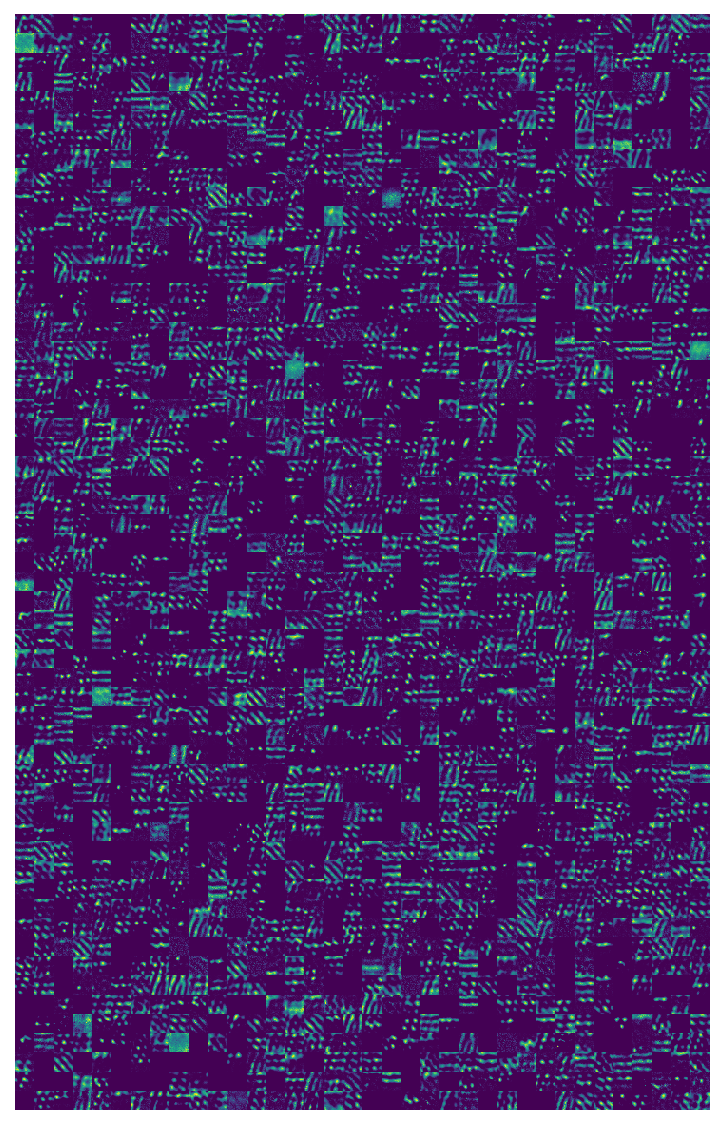

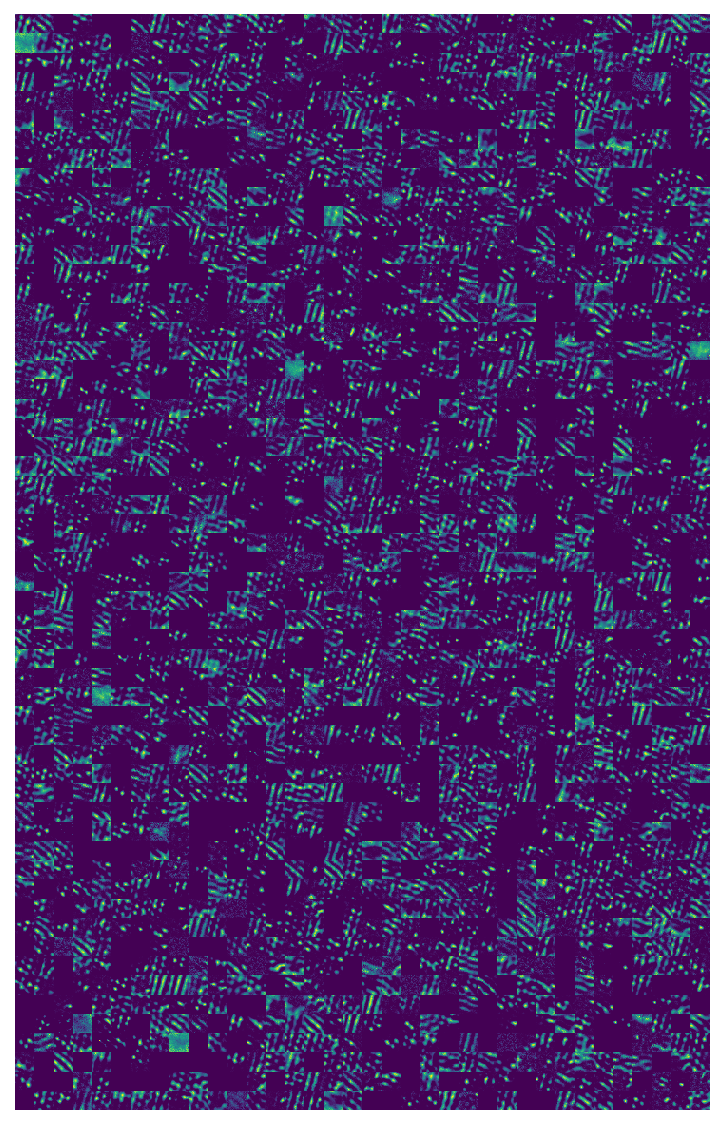

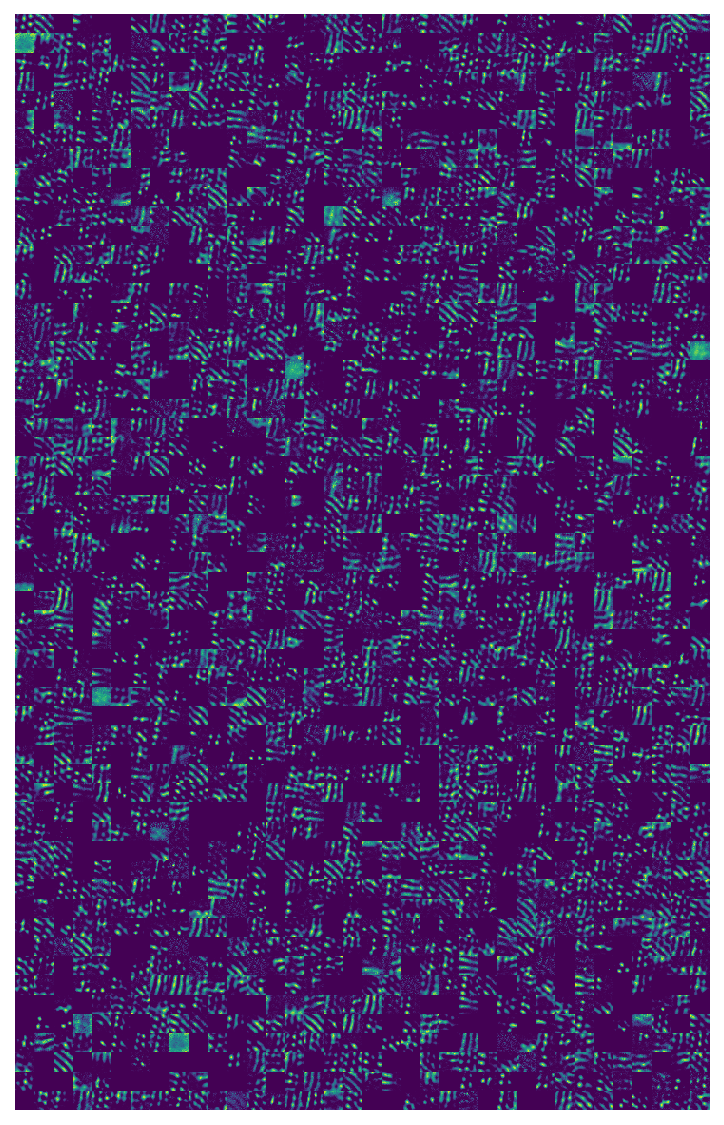

In [9]:
for env_i in tqdm.trange(3):
    ratemap_i_path = experiment.paths['ratemaps'] / f'env_{env_i}'
    ratemap_i_path /= filenames(ratemap_i_path)[-1]
    with open(ratemap_i_path, 'rb') as f:
        ratemaps = pickle.load(f)

    fig, axs = multiimshow(ratemaps[idxs],ncols=36,figsize=figsize)
    fig.savefig(experiment.paths['experiment'] / f'plots/lots-of-ratemaps-{env_i}')